# Grace Techau
## Box Office Revenue & Letterboxd Ratings Project 
### NOTEBOOK 6
### Final Analysis and EDA 

In [2]:
## import all required libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

Read in file '2017_2019_final_film_data.csv' to a pandas data frame. \
\
This file is the fully merged, clean movie data including the title and year of the movie and subsequent rating data from Letterboxd and box office revenue data from the Kaggle data set. 

In [4]:
film_data = pd.read_csv('2017_2019_final_film_data.csv', encoding='utf-8')

print(f"Total movies in data set: {len(film_data)}")
print('-'*50)
display(film_data.head(10))

Total movies in data set: 491
--------------------------------------------------


,title,year,length,worldwide_revenue,domestic_revenue,domestic_percent,foreign_revenue,foreign_percent,number_ratings,average_rating,genres
0,Beauty and the Beast,2017,129,1263.52,504.01,0.40,759.51,0.60,495549,3.1,"Romance, Fantasy, Family"
1,The Fate of the Furious,2017,136,1236.01,226.01,0.18,1010.00,0.82,229455,2.7,"Crime, Action, Thriller"
2,Despicable Me 3,2017,90,1034.80,264.62,0.26,770.18,0.74,278201,2.6,"Action, Animation, Family"
3,Jumanji: Welcome to the Jungle,2017,119,962.08,404.52,0.42,557.56,0.58,674676,3.1,"Fantasy, Adventure, Comedy"
4,Spider-Man: Homecoming,2017,133,880.17,334.20,0.38,545.97,0.62,1688069,3.5,"Action, Drama, Adventure"
5,Wolf Warrior 2,2017,124,870.33,2.72,0.00,867.60,1.00,4235,2.7,"Action, War, Thriller"
6,Guardians of the Galaxy Vol. 2,2017,137,863.76,389.81,0.45,473.94,0.55,1384702,3.5,"Action, Science Fiction, Adventure"
7,Thor: Ragnarok,2017,131,853.98,315.06,0.37,538.92,0.63,1565028,3.7,"Adventure, Action, Science Fiction"
8,Wonder Woman,2017,141,822.96,412.56,0.50,410.40,0.50,867491,3.3,"Action, Fantasy, Adventure"
9,Coco,2017,105,814.64,210.46,0.26,604.18,0.74,1729448,4.1,"Adventure, Animation, Music"


# Exploratory Data Analysis 

In [6]:
## basic information about data set 
print('Film Data Information')
print("-"*50)
print(film_data.info())
print("\n")

print("Film Data Description")
print("-"*50)
print(film_data.describe())

Film Data Information
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              491 non-null    object 
 1   year               491 non-null    int64  
 2   length             491 non-null    int64  
 3   worldwide_revenue  491 non-null    float64
 4   domestic_revenue   491 non-null    float64
 5   domestic_percent   491 non-null    float64
 6   foreign_revenue    491 non-null    float64
 7   foreign_percent    491 non-null    float64
 8   number_ratings     491 non-null    int64  
 9   average_rating     491 non-null    float64
 10  genres             491 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 42.3+ KB
None


Film Data Description
--------------------------------------------------
              year      length  worldwide_revenue  dome

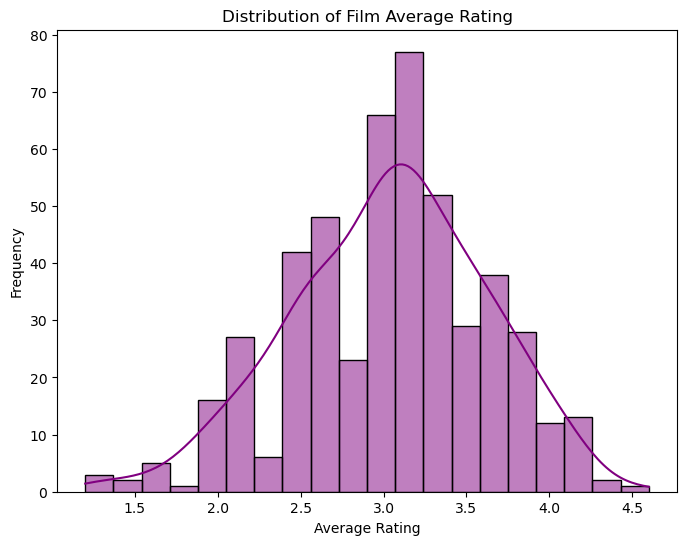

In [7]:
## Distribution of numerical value average rating

plt.figure(figsize=(8,6))
sns.histplot(film_data['average_rating'], bins=20, kde=True, color='purple')
plt.title('Distribution of Film Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


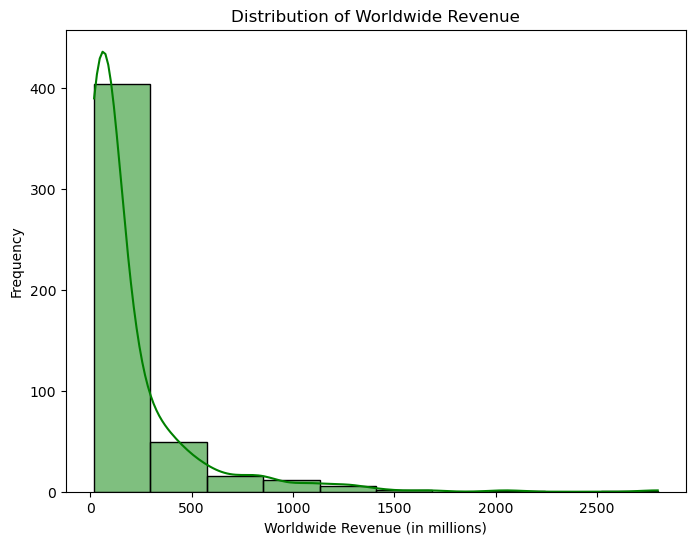

In [8]:
## Distribution of numerical value worldwide revenue 

plt.figure(figsize=(8,6))
sns.histplot(film_data['worldwide_revenue'], bins=10, kde=True, color='green')
plt.title('Distribution of Worldwide Revenue')
plt.xlabel('Worldwide Revenue (in millions)')
plt.ylabel('Frequency')
plt.show()

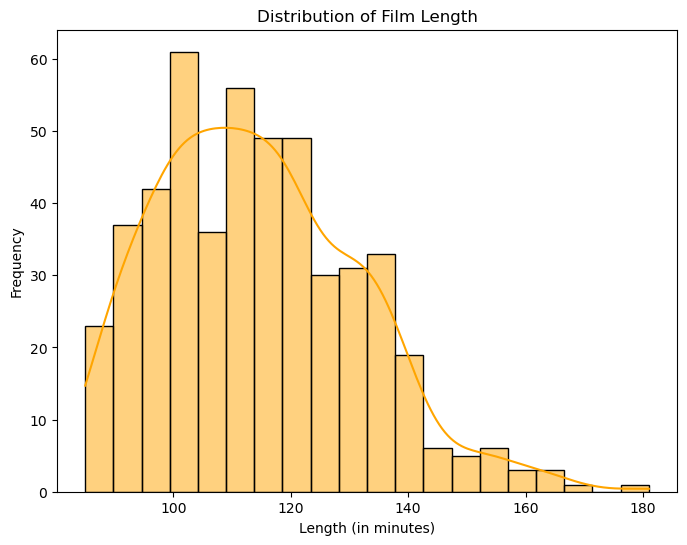

In [9]:
## Distribution of numerical value film length  

plt.figure(figsize=(8,6))
sns.histplot(film_data['length'], bins=20, kde=True, color='orange')
plt.title('Distribution of Film Length')
plt.xlabel('Length (in minutes)')
plt.ylabel('Frequency')
plt.show()

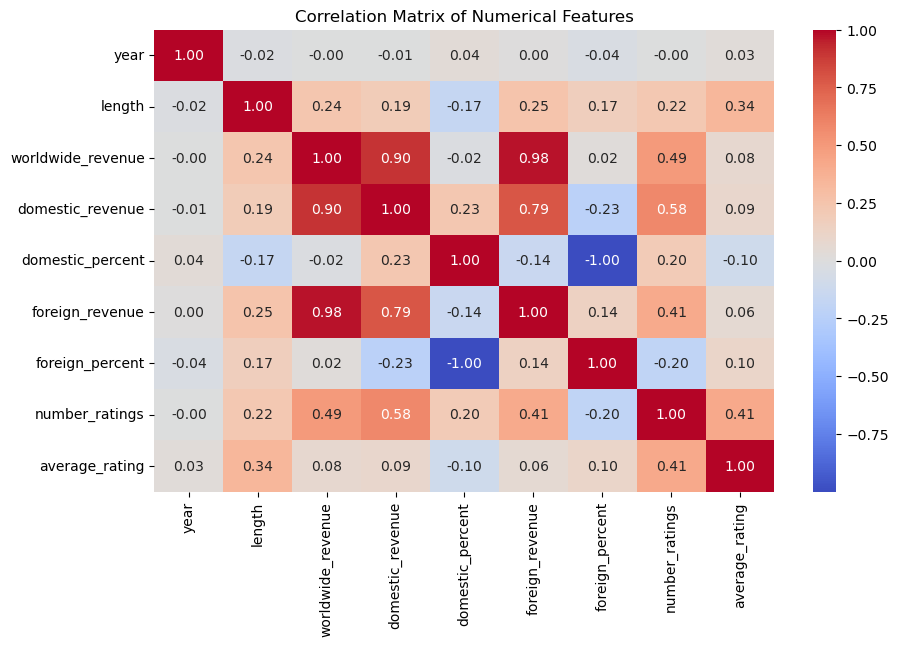

In [10]:
## Correlation matrix which will visualize how different numerical variables relate 
## to one another using a heatmap 

numerical_columns = film_data.select_dtypes(include='number')

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Pearson Correlation: 0.3414
Interpretation: Moderate linear correlation.




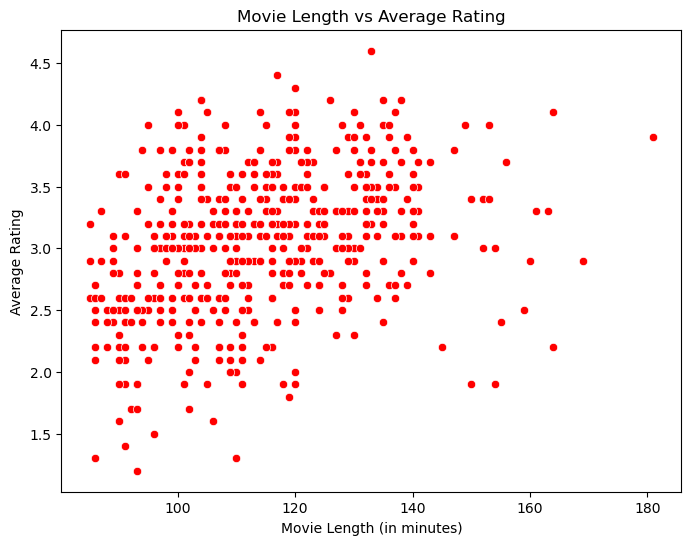

In [11]:
# Determine relationship between length and average rating 

# calcuate a Pearson correlation between length and average rating 
pearson_corr1 = film_data['length'].corr(film_data['average_rating'], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr1:.4f}")

# interpretation
if abs(pearson_corr1) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr1) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

print("\n")

# make a scatter plot 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length', y='average_rating', data=film_data, color='red')
plt.title('Movie Length vs Average Rating')
plt.xlabel('Movie Length (in minutes)')
plt.ylabel('Average Rating')
plt.show()


Pearson Correlation: 0.2419
Interpretation: No or weak linear correlation.




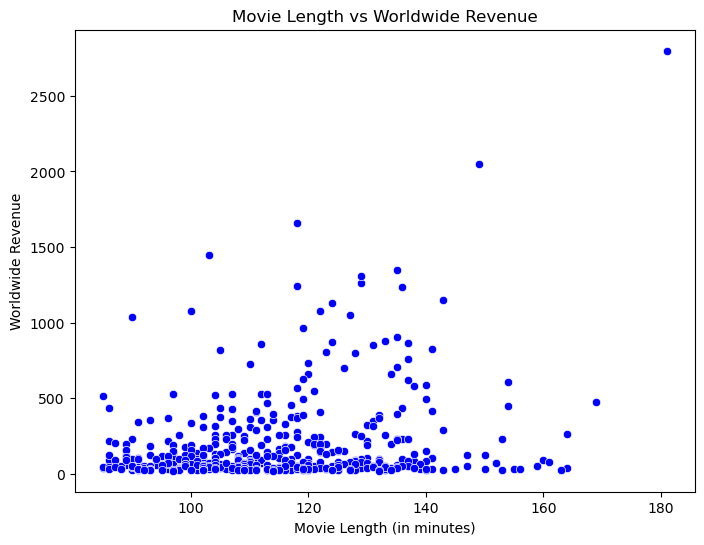

In [63]:
# Determine relationship between length and worldwide revenue

# calcuate a Pearson correlation between length and worldwide revenue
pearson_corr2 = film_data['length'].corr(film_data['worldwide_revenue'], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr2:.4f}")

# interpretation
if abs(pearson_corr2) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr2) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

print("\n")

# make a scatter plot 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length', y='worldwide_revenue', data=film_data, color='blue')
plt.title('Movie Length vs Worldwide Revenue')
plt.xlabel('Movie Length (in minutes)')
plt.ylabel('Worldwide Revenue')
plt.show()


Pearson Correlation: 0.7871
Interpretation: Strong linear correlation.




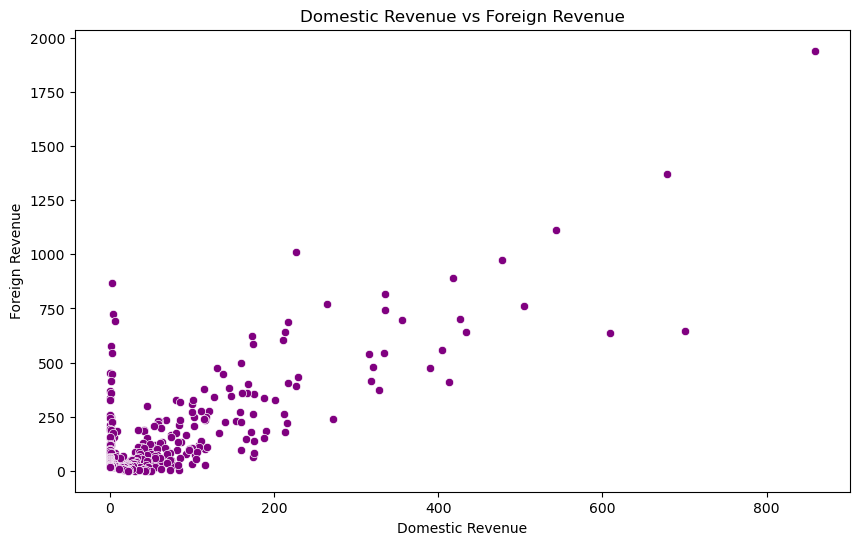

In [13]:
## Determine relationship between domestic and foreign revenue 

# calcuate a Pearson correlation between foreign revenue and foreign revenue  
pearson_corr3 = film_data['domestic_revenue'].corr(film_data['foreign_revenue'], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr3:.4f}")

# interpretation
if abs(pearson_corr3) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr3) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

print("\n")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_revenue', y='foreign_revenue', data=film_data, color='purple')
plt.title('Domestic Revenue vs Foreign Revenue')
plt.xlabel('Domestic Revenue')
plt.ylabel('Foreign Revenue')
plt.show()

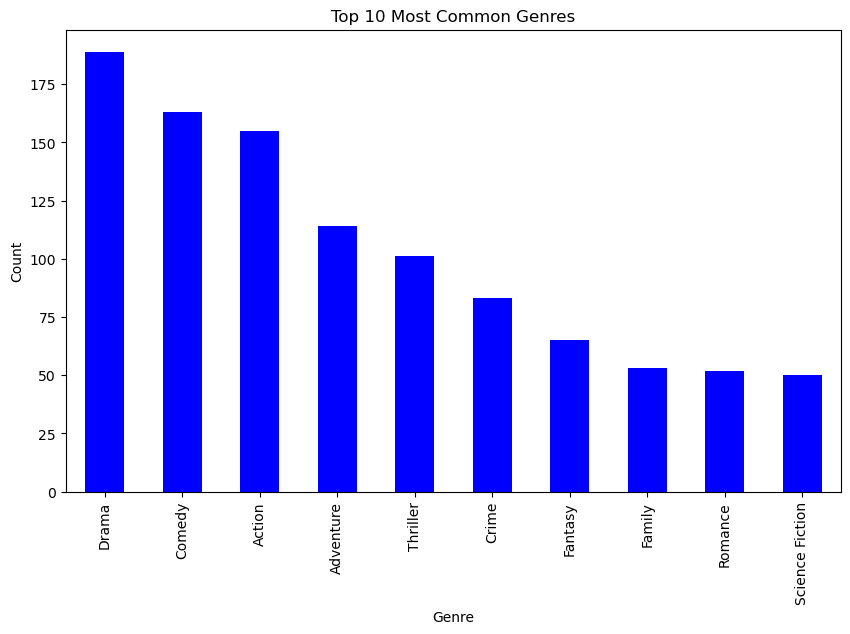

In [14]:
## Find the most common genres 

all_genres = [genre.strip() for sublist in film_data['genres'].str.split(',') for genre in sublist]
genres_counts = pd.Series(all_genres).value_counts()

# Plot a bar chart of frequency of different genres 
plt.figure(figsize=(10,6))
genres_counts.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [15]:
## Find the top 10 highest rated movies in the data set 
top_rated_movies = film_data.sort_values(by=['average_rating'], ascending=False).head(10)

print("Top 10 Highest Rated Movies")
print("-"*50)
display(top_rated_movies[['title', 'year', 'average_rating']])


Top 10 Highest Rated Movies
--------------------------------------------------


,title,year,average_rating
354,Parasite,2019,4.6
182,Spider-Man: Into the Spider-Verse,2018,4.4
252,Shoplifters,2018,4.3
258,Capernaum,2018,4.2
33,Get Out,2017,4.2
36,Paddington 2,2017,4.2
72,A Taxi Driver,2017,4.2
363,Little Women,2019,4.2
100,Phantom Thread,2017,4.1
348,1917,2019,4.1


In [16]:
## Find the top 10 highest earning worldwide revenue movies in the data set 
top_earning_movies = film_data.sort_values(by=['worldwide_revenue'], ascending=False).head(10)

print("Top 10 Highest Earning Movies based on WorldWide Revenue")
print("-"*50)
display(top_earning_movies[['title', 'year', 'worldwide_revenue']])

Top 10 Highest Earning Movies based on WorldWide Revenue
--------------------------------------------------


,title,year,worldwide_revenue
329,Avengers: Endgame,2019,2799.44
159,Avengers: Infinity War,2018,2048.36
330,The Lion King,2019,1656.94
331,Frozen II,2019,1450.03
160,Black Panther,2018,1346.91
161,Jurassic World: Fallen Kingdom,2018,1308.47
0,Beauty and the Beast,2017,1263.52
162,Incredibles 2,2018,1242.81
1,The Fate of the Furious,2017,1236.01
163,Aquaman,2018,1151.96


In [17]:
print(film_data.dtypes)

title                 object
year                   int64
length                 int64
worldwide_revenue    float64
domestic_revenue     float64
domestic_percent     float64
foreign_revenue      float64
foreign_percent      float64
number_ratings         int64
average_rating       float64
genres                object
dtype: object


Average Rating 2017 to 2019
--------------------------------------------------


,year,average_rating
0,2017,3.01
1,2018,3.03
2,2019,3.06


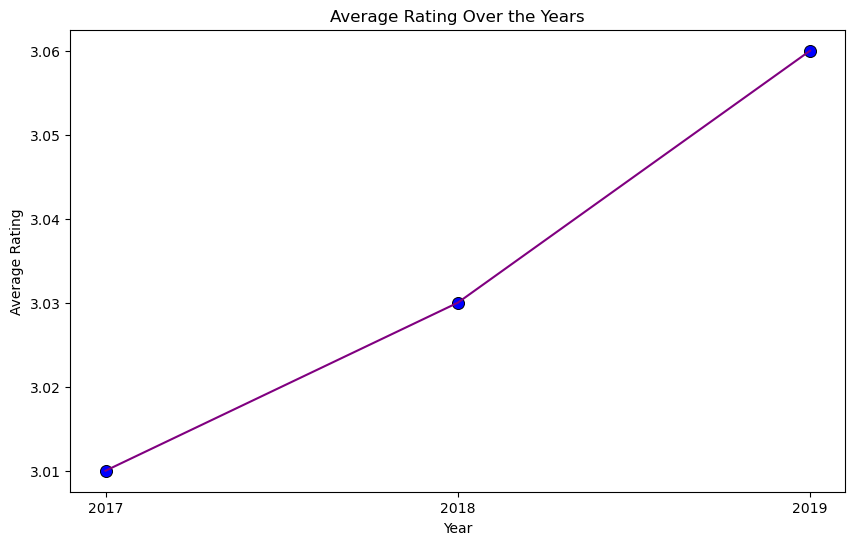

In [18]:
# how did average rating change over the years 
yearly_rating = film_data.groupby('year')['average_rating'].mean().reset_index()
yearly_rating['average_rating'] = yearly_rating['average_rating'].round(2)

print("Average Rating 2017 to 2019")
print("-"*50)
display(yearly_rating)
print("\n")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='average_rating', data=yearly_rating, s=75, color='blue', edgecolor='black')
sns.lineplot(x='year', y='average_rating', data=yearly_rating, color='purple')
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(yearly_rating['year'])
plt.show()



Average Worldwide Revenue (in millions) 2017 to 2019
--------------------------------------------------


,year,worldwide_revenue
0,2017,188.41
1,2018,186.30
2,2019,187.38


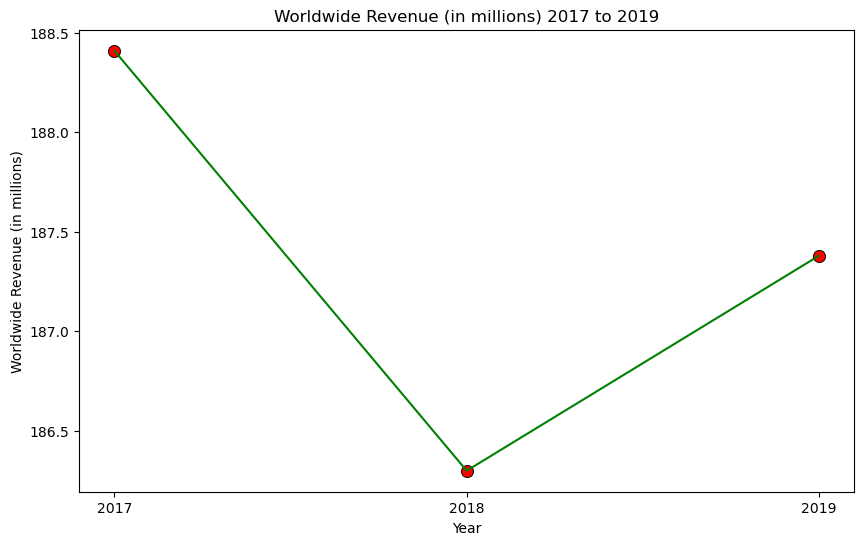

In [19]:
# how did worldwide revenue change over the years 
yearly_rating2 = film_data.groupby('year')['worldwide_revenue'].mean().reset_index()
yearly_rating2['worldwide_revenue'] = yearly_rating2['worldwide_revenue'].round(2)

print("Average Worldwide Revenue (in millions) 2017 to 2019")
print("-"*50)
display(yearly_rating2)
print("\n")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='worldwide_revenue', data=yearly_rating2, s=75, color='red', edgecolor='black')
sns.lineplot(x='year', y='worldwide_revenue', data=yearly_rating2, color='green')
plt.title('Worldwide Revenue (in millions) 2017 to 2019')
plt.xlabel('Year')
plt.ylabel('Worldwide Revenue (in millions)')
plt.xticks(yearly_rating2['year'])
plt.show()


# Final Report Analysis 

In this project, I focused on the possible correlation between a film’s box office revenue and average Letterboxd rating. More specifically, I searched for answers to the following analysis questions I presented in my project proposal: 
- Do movies that performed better at the box office in terms of worldwide, domestic and foreign revenue, have a higher average rating on Letterboxd?
- Do movies that have higher foreign or domestic revenue have a higher average rating on Letterboxd?
- Do longer or shorter movies make a higher revenue (worldwide, domestic and foreign) at the box office?
- Do longer or shorter movies get rated higher on Letterboxd?
- What genre of movie has the highest ratings on Letterboxd?
- Does that same genre of movie perform better at the box office in terms of worldwide, domestic and foreign revenue? \
\
I performed a variety of statistical analysis and query methods to search for answers to these questions:  





Pearson Correlation: 0.0763
Interpretation: No or weak linear correlation.




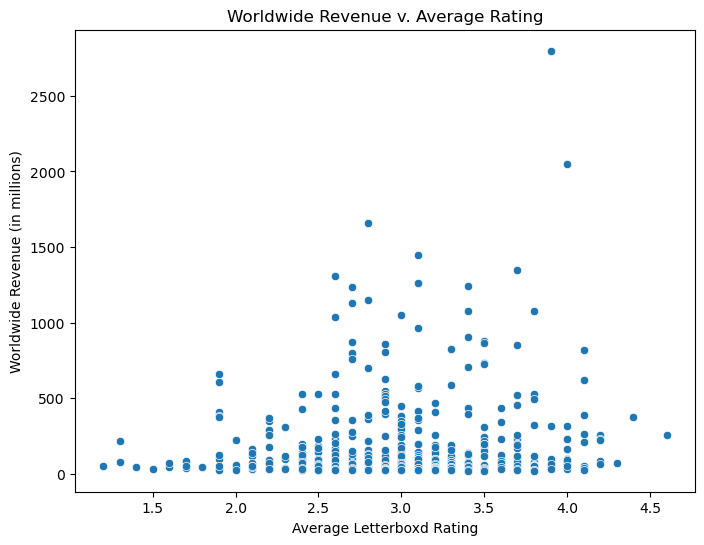

In [22]:
############################################################################
##### Work in this code is used to answer questions 1 in final report ######
############################################################################

# calcuate a Pearson correlation between worldwide revenue and average rating 
pearson_corr4 = film_data['worldwide_revenue'].corr(film_data['average_rating'], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr4:.4f}")

# interpretation
if abs(pearson_corr4) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr4) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

print("\n")

# plot scatter plot 
plt.figure(figsize=(8,6))
sns.scatterplot(x='average_rating', y='worldwide_revenue', data=film_data)
plt.title('Worldwide Revenue v. Average Rating')
plt.xlabel('Average Letterboxd Rating')
plt.ylabel('Worldwide Revenue (in millions)')
plt.show()

Pearson Correlation: 0.0928
Interpretation: No or weak linear correlation.




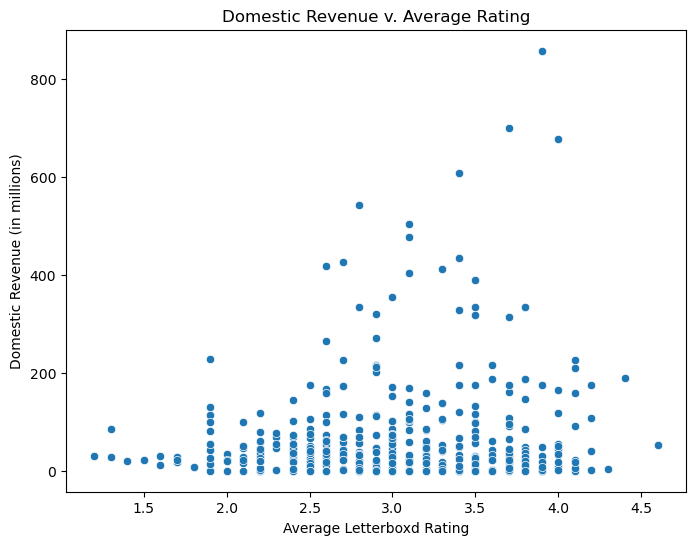

In [23]:
############################################################################
##### Work in this code is used to answer questions 1 in final report ######
############################################################################

# calcuate a Pearson correlation between domestic and average rating 
pearson_corr5 = film_data['domestic_revenue'].corr(film_data['average_rating'], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr5:.4f}")

# interpretation
if abs(pearson_corr5) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr5) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

print("\n")

# plot scatter plot 
plt.figure(figsize=(8,6))
sns.scatterplot(x='average_rating', y='domestic_revenue', data=film_data)
plt.title('Domestic Revenue v. Average Rating')
plt.xlabel('Average Letterboxd Rating')
plt.ylabel('Domestic Revenue (in millions)')
plt.show()

Pearson Correlation: 0.0623
Interpretation: No or weak linear correlation.




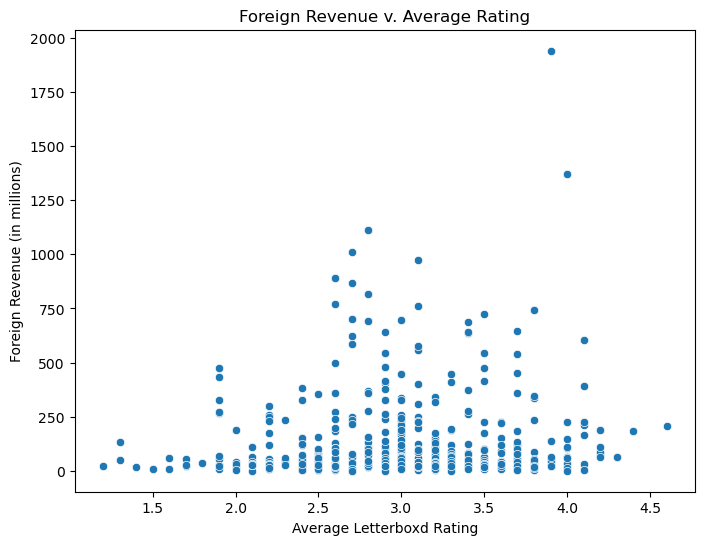

In [24]:
############################################################################
##### Work in this code is used to answer questions 1 in final report ######
############################################################################

# calcuate a Pearson correlation between foreign and average rating 
pearson_corr6 = film_data['foreign_revenue'].corr(film_data['average_rating'], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr6:.4f}")

# interpretation
if abs(pearson_corr6) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr6) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

print("\n")

# plot scatter plot 
plt.figure(figsize=(8,6))
sns.scatterplot(x='average_rating', y='foreign_revenue', data=film_data)
plt.title('Foreign Revenue v. Average Rating')
plt.xlabel('Average Letterboxd Rating')
plt.ylabel('Foreign Revenue (in millions)')
plt.show()

In [25]:
############################################################################
### Work in this code is used to answer questions 1 & 2 in final report ####
############################################################################

## find the 5 films with the highest worldwide revenue and their associated Letterboxd rating
worldwide_highest = film_data.nlargest(5, 'worldwide_revenue')[['title', 'average_rating']]

## find the 5 films with the highest domestic revenue and their associated Letterboxd rating
domestic_highest = film_data.nlargest(5, 'domestic_revenue')[['title', 'average_rating']]

## find the 5 films with the highest foreign revenue and their associated Letterboxd rating
foreign_highest = film_data.nlargest(5, 'foreign_revenue')[['title', 'average_rating']]

## combine the results into a new data frame 

highest_rev = pd.DataFrame({
    'Highest Worldwide': worldwide_highest['title'].values, 
    'Highest Worldwide Rating' : worldwide_highest['average_rating'].values, 
    'Highest Domestic': domestic_highest['title'].values, 
    'Highest Domestic Rating' : domestic_highest['average_rating'].values, 
    'Highest Foreign': foreign_highest['title'].values, 
    'Highest Foreign Rating' : foreign_highest['average_rating'].values, 
    
})

print("Films with Highest Revenue and Associated Letterboxd Rating")
print("-"*50)
display(highest_rev)


Films with Highest Revenue and Associated Letterboxd Rating
--------------------------------------------------


,Highest Worldwide,Highest Worldwide Rating,Highest Domestic,Highest Domestic Rating,Highest Foreign,Highest Foreign Rating
0,Avengers: Endgame,3.9,Avengers: Endgame,3.9,Avengers: Endgame,3.9
1,Avengers: Infinity War,4.0,Black Panther,3.7,Avengers: Infinity War,4.0
2,The Lion King,2.8,Avengers: Infinity War,4.0,The Lion King,2.8
3,Frozen II,3.1,Incredibles 2,3.4,The Fate of the Furious,2.7
4,Black Panther,3.7,The Lion King,2.8,Frozen II,3.1


In [26]:
############################################################################
##### Work in this code is used to answer questions 3 in final report ######
############################################################################

# create data frame of movies longer than 120 minutes (2 hours)
long_movies = film_data[film_data['length'] > 120]

# create data frame of movies shorter than 120 minutes 
regular_movies = film_data[film_data['length'] <= 120]

# find average worldwide, domestic, and foreign revenue for long movies 
worldwide_long = round(long_movies['worldwide_revenue'].mean(),2)
domestic_long = round(long_movies['domestic_revenue'].mean(),2)
foreign_long = round(long_movies['foreign_revenue'].mean(),2)

# find average worldwide, domestic, and foreign revenue for long movies 
worldwide_regular = round(regular_movies['worldwide_revenue'].mean(),2)
domestic_regular = round(regular_movies['domestic_revenue'].mean(),2)
foreign_regular = round(regular_movies['foreign_revenue'].mean(),2)

print("AVERAGE WORLDWIDE REVENUE OF LONG v. REGULAR MOVIES")
print("-"*50)
print(f"Average of worldwide revenue of long movies: {worldwide_long}")
print(f"Average of worldwide revenue of regular movies: {worldwide_regular}")
print("\n")

print("AVERAGE DOMESTIC REVENUE OF LONG v. REGULAR MOVIES")
print("-"*50)
print(f"Average of domestic revenue of long movies: {domestic_long}")
print(f"Average of domestic revenue of regular movies: {domestic_regular}")
print("\n")

print("AVERAGE FOREIGN REVENUE OF LONG v. REGULAR MOVIES")
print("-"*50)
print(f"Average of foreign revenue of long movies: {foreign_long}")
print(f"Average of foreign revenue of regular movies: {foreign_regular}")
print("\n")

AVERAGE WORLDWIDE REVENUE OF LONG v. REGULAR MOVIES
--------------------------------------------------
Average of worldwide revenue of long movies: 266.41
Average of worldwide revenue of regular movies: 149.82


AVERAGE DOMESTIC REVENUE OF LONG v. REGULAR MOVIES
--------------------------------------------------
Average of domestic revenue of long movies: 81.67
Average of domestic revenue of regular movies: 48.65


AVERAGE FOREIGN REVENUE OF LONG v. REGULAR MOVIES
--------------------------------------------------
Average of foreign revenue of long movies: 184.73
Average of foreign revenue of regular movies: 101.18




In [27]:
############################################################################
##### Work in this code is used to answer questions 4 in final report ######
############################################################################

# find average rating of long movies
mean_rating_long = round(long_movies['average_rating'].mean(),2)

# find average rating of regular movies
mean_rating_regular = round(regular_movies['average_rating'].mean(),2)

print("AVERAGE RATING OF LONG v. REGULAR MOVIES")
print("-"*50)
print(f"Average rating of long movies: {mean_rating_long}")
print(f"Average rating of regular movies: {mean_rating_regular}")

AVERAGE RATING OF LONG v. REGULAR MOVIES
--------------------------------------------------
Average rating of long movies: 3.27
Average rating of regular movies: 2.92


In [28]:
############################################################################
##### Work in this code is used to answer questions 5 in final report ######
############################################################################

genre_ratings = {}
genre_counts = {}

for _, row in film_data.iterrows(): 
    rating = row['average_rating']
    genres = row['genres'].split(',')
    for genre in genres:
        genre = genre.strip()
        if genre not in genre_ratings:
            genre_ratings[genre] = 0 
            genre_counts[genre] = 0 
        genre_ratings[genre] += rating 
        genre_counts[genre] += 1 

genre_avg_rating = {genre: round(genre_ratings[genre] / genre_counts[genre], 2) for genre in genre_ratings} 

genre_avg_rating_df = pd.DataFrame(list(genre_avg_rating.items()), columns=['Genre', 'Average Rating'])

print("Average Rating by Genre")
print("-"*50)
display(genre_avg_rating_df)

Average Rating by Genre
--------------------------------------------------


,Genre,Average Rating
0,Romance,3.10
1,Fantasy,2.86
2,Family,2.87
3,Crime,3.17
4,Action,2.92
5,Thriller,3.00
6,Animation,3.10
7,Adventure,2.92
8,Comedy,2.99
9,Drama,3.30


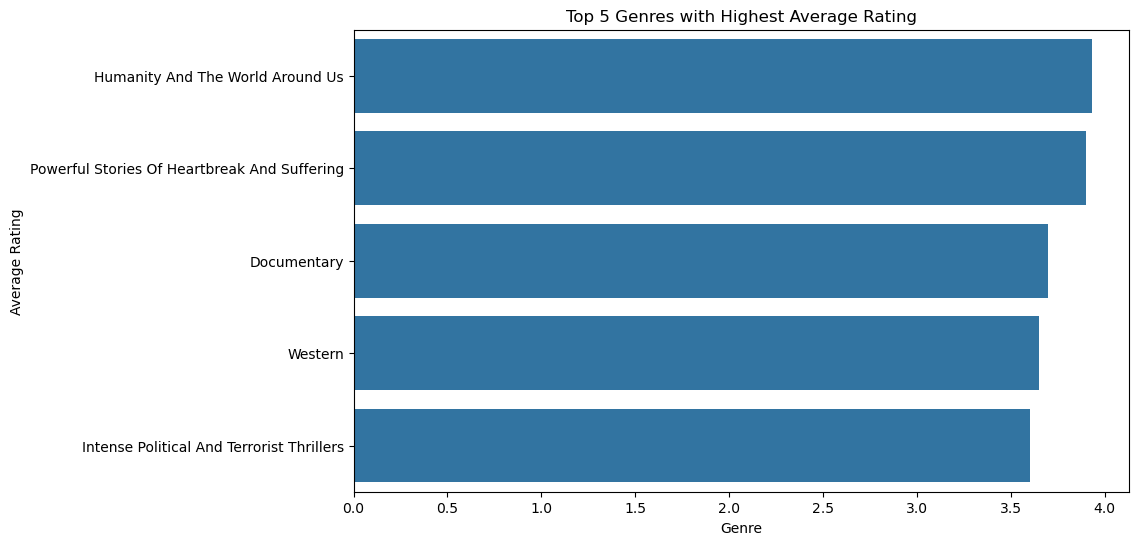

In [29]:
############################################################################
##### Work in this code is used to answer questions 5 in final report ######
############################################################################

# find top 5 genres by average rating 
top_5_genres = genre_avg_rating_df.sort_values(by='Average Rating', ascending=False).head(5)

# Plot a bar chart of top 5 genres by average rating 
plt.figure(figsize=(10,6))
sns.barplot(x='Average Rating', y="Genre", data=top_5_genres)
plt.title('Top 5 Genres with Highest Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

In [30]:
############################################################################
##### Work in this code is used to answer questions 5 in final report ######
############################################################################

# Find the genre with the highest average rating from new data frame 
highest_rated_genre = genre_avg_rating_df.loc[genre_avg_rating_df['Average Rating'].idxmax()]

# Find the genre with the lowest average rating from new data frame 
lowest_rated_genre = genre_avg_rating_df.loc[genre_avg_rating_df['Average Rating'].idxmin()]

print("Highest Rated Genre")
print('-'*50)
display(highest_rated_genre)
print("\n")

print("Lowest Rated Genre")
print('-'*50)
display(lowest_rated_genre)


Highest Rated Genre
--------------------------------------------------


Genre             Humanity And The World Around Us
Average Rating                                3.93
Name: 21, dtype: object



Lowest Rated Genre
--------------------------------------------------


Genre             Thrillers And Murder Mysteries
Average Rating                               1.8
Name: 33, dtype: object

In [31]:
############################################################################
##### Work in this code is used to answer questions 6 in final report ######
############################################################################

genre_revenue = {'worldwide': {}, 'domestic': {}, 'foreign': {}}
genre_counts = {'worldwide': {}, 'domestic': {}, 'foreign': {}}

# Loop through each film and collect the worldwide, domestic, and foreign rev for each 
# genre associated with every film 
for _, row in film_data.iterrows(): 
    worldwide_revenue = row['worldwide_revenue']
    domestic_revenue = row['domestic_revenue']
    foreign_revenue = row['foreign_revenue']
    
    genres = row['genres'].split(',')
    for genre in genres:
        genre = genre.strip()

        for revenue_type in ['worldwide', 'domestic', 'foreign']: 
            if genre not in genre_revenue[revenue_type]: 
                genre_revenue[revenue_type][genre] = 0 
                genre_counts[revenue_type][genre] = 0 

        genre_revenue['worldwide'][genre] += worldwide_revenue 
        genre_revenue['domestic'][genre] += domestic_revenue
        genre_revenue['foreign'][genre] += foreign_revenue

        genre_counts['worldwide'][genre] += 1
        genre_counts['domestic'][genre] += 1
        genre_counts['foreign'][genre] += 1
       
genre_avg_rev = {
    revenue_type: {
        genre: round(genre_revenue[revenue_type][genre] / genre_counts[revenue_type][genre], 2)
        for genre in genre_revenue[revenue_type]
    }
    for revenue_type in ['worldwide', 'domestic', 'foreign']
}

genre_avg_rev_df = pd.DataFrame({
    'Genre' : genre_avg_rev['worldwide'].keys(), 
    'Average Worldwide Revenue' : genre_avg_rev['worldwide'].values(), 
    'Average Domestic Revenue' : genre_avg_rev['domestic'].values(), 
    'Average Foreign Revenue' : genre_avg_rev['foreign'].values()
})


print("Average Worldwide, Domestic, and Foreign by Genre")
print("-"*50)
display(genre_avg_rev_df)

Average Worldwide, Domestic, and Foreign by Genre
--------------------------------------------------


,Genre,Average Worldwide Revenue,Average Domestic Revenue,Average Foreign Revenue
0,Romance,147.35,51.99,95.36
1,Fantasy,272.43,85.26,187.17
2,Family,295.87,101.78,194.09
3,Crime,104.92,31.71,73.22
4,Action,267.78,74.61,193.17
5,Thriller,131.71,37.86,93.85
6,Animation,303.06,99.86,203.19
7,Adventure,350.19,111.83,238.36
8,Comedy,146.64,49.69,96.95
9,Drama,126.45,38.13,88.32


In [32]:
############################################################################
##### Work in this code is used to answer questions 6 in final report ######
############################################################################


# Find the genre with the highest worldwide revenue from new data frame 
highest_worldwide_genre = genre_avg_rev_df.loc[genre_avg_rev_df['Average Worldwide Revenue'].idxmax()]

# Find the genre with the highest domestic revenue from new data frame 
highest_domestic_genre = genre_avg_rev_df.loc[genre_avg_rev_df['Average Domestic Revenue'].idxmax()]

# Find the genre with the highest foreign revenue from new data frame 
highest_foreign_genre = genre_avg_rev_df.loc[genre_avg_rev_df['Average Foreign Revenue'].idxmax()]


print("Highest Worldwide Revenue Genre")
print('-'*50)
display(highest_worldwide_genre)
print("\n")

print("Highest Domestic Revenue Genre")
print('-'*50)
display(highest_domestic_genre)
print("\n")

print("Highest Foreign Revenue Genre")
print('-'*50)
display(highest_foreign_genre)


Highest Worldwide Revenue Genre
--------------------------------------------------


Genre                        Science Fiction
Average Worldwide Revenue             459.46
Average Domestic Revenue              148.31
Average Foreign Revenue               311.16
Name: 11, dtype: object



Highest Domestic Revenue Genre
--------------------------------------------------


Genre                        Dazzling Vocal Performances And Musicals
Average Worldwide Revenue                                      434.99
Average Domestic Revenue                                       174.34
Average Foreign Revenue                                        260.65
Name: 17, dtype: object



Highest Foreign Revenue Genre
--------------------------------------------------


Genre                        Science Fiction
Average Worldwide Revenue             459.46
Average Domestic Revenue              148.31
Average Foreign Revenue               311.16
Name: 11, dtype: object

In [33]:
############################################################################
##### Work in this code is used to answer questions 7 in final report ######
############################################################################

# calcuate the overall average rating for all films in data set 
overall_avg_rating = film_data['average_rating'].mean() 

# only consider films that have been rated by at least 100 Letterboxd users
min_ratings = 100 

top_5 = film_data.assign(
    weighted_rating = round((film_data['average_rating'] * film_data['number_ratings'] + 
                      overall_avg_rating * min_ratings) / (film_data['number_ratings'] + min_ratings),3)
).sort_values('weighted_rating', ascending=False).head(5)


print("Top 5 Movies based on Weighted Rating")
print("-"*50)
display(top_5[['title', 'average_rating', 'number_ratings', 'weighted_rating']])

Top 5 Movies based on Weighted Rating
--------------------------------------------------


,title,average_rating,number_ratings,weighted_rating
354,Parasite,4.6,3233120,4.600
182,Spider-Man: Into the Spider-Verse,4.4,2764289,4.400
252,Shoplifters,4.3,224434,4.299
363,Little Women,4.2,1674110,4.200
36,Paddington 2,4.2,399068,4.200
